In [59]:
import cv2 

img = cv2.imread('./Iris.jpg')
print(img.shape[0], img.shape[1], img.shape[2], len(img.shape))

256 256 3 3


# Convolutional Neural Networks

# Importar Librerías

In [60]:
import numpy as np
import os
import re
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

In [61]:
import keras
import tensorflow as tf
from tensorflow.keras.utils import to_categorical
from keras.models import Sequential,Model
from tensorflow.keras.layers import Input
from keras.layers import Dense, Dropout, Flatten
#from keras.layers import Conv2D, MaxPooling2D
#from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import (
    BatchNormalization, SeparableConv2D, MaxPooling2D, Activation, Flatten, Dropout, Dense, Conv2D
)
from keras.layers import LeakyReLU

# Cargar set de Imágenes

In [62]:
dirname = os.path.join(os.getcwd(),'E:\Datsets\Flores')
imgpath = dirname + os.sep 

images = []
directories = []
dircount = []
prevRoot=''
cant=0

print("leyendo imagenes de ",imgpath)

for root, dirnames, filenames in os.walk(imgpath):
    for filename in filenames:
        if re.search("\.(jpg|jpeg|png|bmp|tiff)$", filename):
            cant=cant+1
            filepath = os.path.join(root, filename)
            image = plt.imread(filepath)
            if(len(image.shape)==3):
                
                images.append(image)
            b = "Leyendo..." + str(cant)
            print (b, end="\r")
            if prevRoot !=root:
                print(root, cant)
                prevRoot=root
                directories.append(root)
                dircount.append(cant)
                cant=0
dircount.append(cant)

dircount = dircount[1:]
dircount[0]=dircount[0]+1
print('Directorios leidos:',len(directories))
print("Imagenes en cada directorio", dircount)
print('suma Total de imagenes en subdirs:',sum(dircount))

leyendo imagenes de  E:\Datsets\Flores\
E:\Datsets\Flores\astilbe 1
E:\Datsets\Flores\iris 29656
E:\Datsets\Flores\rose 10410
E:\Datsets\Flores\sunflower 44608
E:\Datsets\Flores\tulip 11640
Directorios leidos: 5
Imagenes en cada directorio [29657, 10410, 44608, 11640, 11335]
suma Total de imagenes en subdirs: 107650


# Creamos las etiquetas

In [63]:
labels=[]
indice=0
for cantidad in dircount:
    for i in range(cantidad):
        labels.append(indice)
    indice=indice+1
print("Cantidad etiquetas creadas: ",len(labels))


Cantidad etiquetas creadas:  107650


In [64]:
deportes=[]
indice=0
for directorio in directories:
    name = directorio.split(os.sep)
    print(indice , name[len(name)-1])
    deportes.append(name[len(name)-1])
    indice=indice+1

0 astilbe
1 iris
2 rose
3 sunflower
4 tulip


In [65]:
images_resized = [cv2.resize(img, (28, 28)) for img in images]
y = np.array(labels)
X = np.array(images_resized, dtype=np.uint8) #convierto de lista a numpy



# Find the unique numbers from the train labels
classes = np.unique(y)
nClasses = len(classes)
print('Total number of outputs : ', nClasses)
print('Output classes : ', classes)

Total number of outputs :  5
Output classes :  [0 1 2 3 4]


# Creamos Sets de Entrenamiento y Test

In [66]:
train_X,test_X,train_Y,test_Y = train_test_split(X,y,test_size=0.2)
print('Training data shape : ', train_X.shape, train_Y.shape)
print('Testing data shape : ', test_X.shape, test_Y.shape)

Training data shape :  (86120, 28, 28, 3) (86120,)
Testing data shape :  (21530, 28, 28, 3) (21530,)


Text(0.5, 1.0, 'Ground Truth : 4')

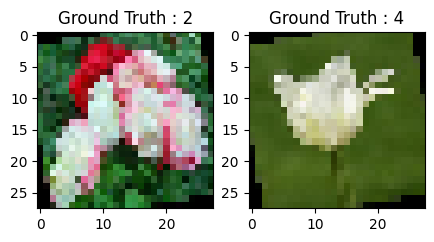

In [67]:
plt.figure(figsize=[5,5])

# Display the first image in training data
plt.subplot(121)
plt.imshow(train_X[0,:,:], cmap='gray')
plt.title("Ground Truth : {}".format(train_Y[0]))

# Display the first image in testing data
plt.subplot(122)
plt.imshow(test_X[0,:,:], cmap='gray')
plt.title("Ground Truth : {}".format(test_Y[0]))

# Preprocesamos las imagenes

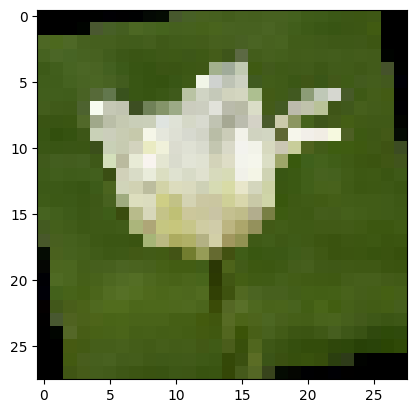

In [68]:
train_X = train_X.astype('float32')
test_X = test_X.astype('float32')
train_X = train_X/255.
test_X = test_X/255.
plt.imshow(test_X[0,:,:])

## Hacemos el One-hot Encoding para la red

In [69]:
# Change the labels from categorical to one-hot encoding
train_Y_one_hot = to_categorical(train_Y)
test_Y_one_hot = to_categorical(test_Y)

# Display the change for category label using one-hot encoding
print('Original label:', train_Y[0])
print('After conversion to one-hot:', train_Y_one_hot[0])

Original label: 2
After conversion to one-hot: [0. 0. 1. 0. 0.]


# Creamos el Set de Entrenamiento y Validación

In [70]:
#Mezclar todo y crear los grupos de entrenamiento y testing
train_X,valid_X,train_label,valid_label = train_test_split(train_X, train_Y_one_hot, test_size=0.2, random_state=13)

In [71]:
print(train_X.shape,valid_X.shape,train_label.shape,valid_label.shape)

(68896, 28, 28, 3) (17224, 28, 28, 3) (68896, 5) (17224, 5)


# Creamos el modelo de CNN

In [72]:
#declaramos variables con los parámetros de configuración de la red
INIT_LR = 1e-3 # Valor inicial de learning rate. El valor 1e-3 corresponde con 0.001
epochs = 50 # Cantidad de iteraciones completas al conjunto de imagenes de entrenamiento
batch_size = 32 # cantidad de imágenes que se toman a la vez en memoria

In [73]:
sport_model = Sequential()
sport_model.add(Conv2D(32, kernel_size=(3, 3),activation='linear',padding='same',input_shape=(28,28,3)))
sport_model.add(LeakyReLU(alpha=0.1))
sport_model.add(MaxPooling2D((2, 2),padding='same'))
sport_model.add(Dropout(0.5))

sport_model.add(Flatten())
sport_model.add(Dense(32, activation='linear'))
sport_model.add(LeakyReLU(alpha=0.1))
sport_model.add(Dropout(0.5))
sport_model.add(Dense(nClasses, activation='softmax'))

In [74]:
sport_model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 28, 28, 32)        896       
                                                                 
 leaky_re_lu_4 (LeakyReLU)   (None, 28, 28, 32)        0         
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 14, 14, 32)        0         
 g2D)                                                            
                                                                 
 dropout_4 (Dropout)         (None, 14, 14, 32)        0         
                                                                 
 flatten_2 (Flatten)         (None, 6272)              0         
                                                                 
 dense_4 (Dense)             (None, 32)                200736    
                                                      

In [75]:
sport_model.compile(loss=keras.losses.categorical_crossentropy, optimizer=tf.keras.optimizers.legacy.SGD(learning_rate=INIT_LR, decay=INIT_LR / 100),metrics=['accuracy'])

# Entrenamos el modelo: Aprende a clasificar imágenes

In [76]:
# este paso puede tomar varios minutos, dependiendo de tu ordenador, cpu y memoria ram libre
sport_train = sport_model.fit(train_X, train_label, batch_size=batch_size,epochs=epochs,verbose=1,validation_data=(valid_X, valid_label))

Epoch 1/50
2153/2153 [==============================] - 16s 5ms/step - loss: 1.2710 - accuracy: 0.5062 - val_loss: 1.0243 - val_accuracy: 0.6206
Epoch 2/50
2153/2153 [==============================] - 10s 5ms/step - loss: 1.0643 - accuracy: 0.5975 - val_loss: 0.9037 - val_accuracy: 0.6537
Epoch 3/50
2153/2153 [==============================] - 10s 5ms/step - loss: 0.9771 - accuracy: 0.6321 - val_loss: 0.8374 - val_accuracy: 0.6908
Epoch 4/50
2153/2153 [==============================] - 10s 5ms/step - loss: 0.9249 - accuracy: 0.6545 - val_loss: 0.7844 - val_accuracy: 0.7126
Epoch 5/50
2153/2153 [==============================] - 10s 5ms/step - loss: 0.8760 - accuracy: 0.6734 - val_loss: 0.7501 - val_accuracy: 0.7207
Epoch 6/50
2153/2153 [==============================] - 10s 4ms/step - loss: 0.8475 - accuracy: 0.6854 - val_loss: 0.7230 - val_accuracy: 0.7332
Epoch 7/50
2153/2153 [==============================] - 10s 4ms/step - loss: 0.8208 - accuracy: 0.6949 - val_loss: 0.7023 - val_ac

In [77]:
# guardamos la red, para reutilizarla en el futuro, sin tener que volver a entrenar
sport_model.save("D:\IA\CNN\Flores.h5py")

INFO:tensorflow:Assets written to: D:\IA\CNN\Flores.h5py\assets


INFO:tensorflow:Assets written to: D:\IA\CNN\Flores.h5py\assets


# Evaluamos la red

In [78]:
test_eval = sport_model.evaluate(test_X, test_Y_one_hot, verbose=1)

673/673 [==============================] - 1s 1ms/step - loss: 0.4509 - accuracy: 0.8401


In [79]:
print('Test loss:', test_eval[0])
print('Test accuracy:', test_eval[1])

Test loss: 0.4508565068244934
Test accuracy: 0.8401300311088562


In [80]:
sport_train.history

{'loss': [1.270971417427063,
  1.0643478631973267,
  0.9771478772163391,
  0.9249470829963684,
  0.8759690523147583,
  0.847534716129303,
  0.8208356499671936,
  0.804541826248169,
  0.7875561714172363,
  0.7724100351333618,
  0.7588686943054199,
  0.7463651895523071,
  0.7357714772224426,
  0.7254862189292908,
  0.7169268727302551,
  0.7077202796936035,
  0.7016816735267639,
  0.6928039789199829,
  0.6842975616455078,
  0.6787958145141602,
  0.6727404594421387,
  0.6686421036720276,
  0.661962628364563,
  0.6550294160842896,
  0.6494936943054199,
  0.6421970725059509,
  0.6390685439109802,
  0.6335033178329468,
  0.6288800835609436,
  0.6259863376617432,
  0.6212977170944214,
  0.6185032725334167,
  0.6135429739952087,
  0.6133706569671631,
  0.6073967218399048,
  0.6033212542533875,
  0.5991033315658569,
  0.5942435264587402,
  0.5914689898490906,
  0.5876481533050537,
  0.5848631262779236,
  0.5811135172843933,
  0.5772547721862793,
  0.5734671354293823,
  0.5715782046318054,
  0.57

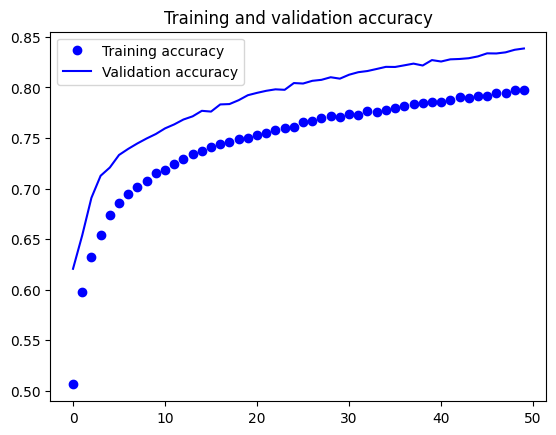

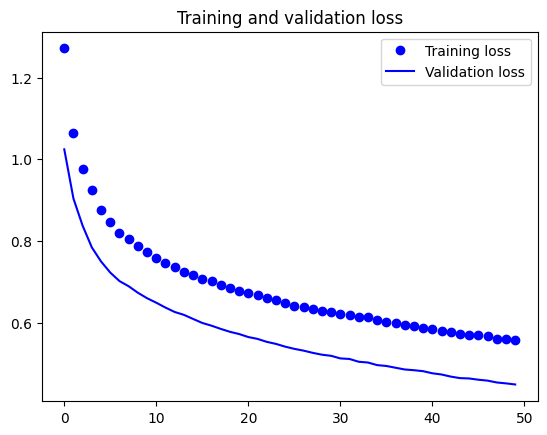

In [81]:
accuracy = sport_train.history['accuracy']
val_accuracy = sport_train.history['val_accuracy']
loss = sport_train.history['loss']
val_loss = sport_train.history['val_loss']
epochs = range(len(accuracy))
plt.plot(epochs, accuracy, 'bo', label='Training accuracy')
plt.plot(epochs, val_accuracy, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [82]:
predicted_classes2 = sport_model.predict(test_X)

673/673 [==============================] - 1s 1ms/step


In [83]:
predicted_classes=[]
for predicted_sport in predicted_classes2:
    predicted_classes.append(predicted_sport.tolist().index(max(predicted_sport)))
predicted_classes=np.array(predicted_classes)

In [84]:
predicted_classes.shape, test_Y.shape

((21530,), (21530,))

# Aprendamos de los errores: Qué mejorar

Found 18088 correct labels


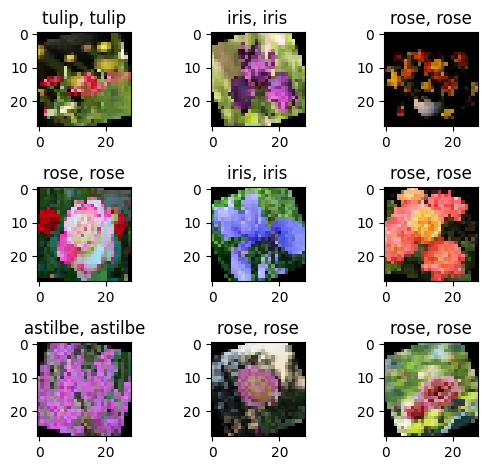

In [85]:
correct = np.where(predicted_classes==test_Y)[0]
print("Found %d correct labels" % len(correct))
for i, correct in enumerate(correct[0:9]):
    plt.subplot(3,3,i+1)
    plt.imshow(test_X[correct].reshape(28,28,3), cmap='gray', interpolation='none')
    plt.title("{}, {}".format(deportes[predicted_classes[correct]],
                                                    deportes[test_Y[correct]]))

    plt.tight_layout()

Found 3442 incorrect labels


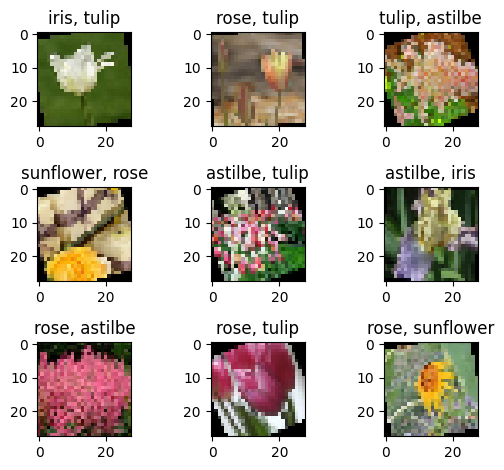

In [86]:
incorrect = np.where(predicted_classes!=test_Y)[0]
print("Found %d incorrect labels" % len(incorrect))
for i, incorrect in enumerate(incorrect[0:9]):
    plt.subplot(3,3,i+1)
    plt.imshow(test_X[incorrect].reshape(28,28,3), cmap='gray', interpolation='none')
    plt.title("{}, {}".format(deportes[predicted_classes[incorrect]],
                                                    deportes[test_Y[incorrect]]))
    plt.tight_layout()

In [87]:
target_names = ["Class {}".format(i) for i in range(nClasses)]
print(classification_report(test_Y, predicted_classes, target_names=target_names))

              precision    recall  f1-score   support

     Class 0       0.83      0.89      0.86      5999
     Class 1       0.91      0.82      0.86      2090
     Class 2       0.83      0.89      0.86      8837
     Class 3       0.88      0.93      0.90      2361
     Class 4       0.81      0.43      0.56      2243

    accuracy                           0.84     21530
   macro avg       0.85      0.79      0.81     21530
weighted avg       0.84      0.84      0.83     21530

